## Regreesion Problem

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
df = pd.read_csv('Datasets/USA_Housing.csv')

In [31]:
pd.DataFrame(data = df)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Region,Price
0,79545.45857,150.000000,NaN,4.09,23086.80050,NaN,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,southeast,1.505891e+06
2,61287.06718,200.000000,NaN,5.13,36882.15940,NaN,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,NaN,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,northwest,6.309435e+05
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,southeast,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,southwest,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,southwest,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,northwest,1.198657e+06


In [32]:
x = df.iloc[:, :-1]
y = df['Price']

### Handling Missing Values

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x.iloc[:, :-1] = imputer.fit_transform(x.iloc[:, :-1])

In [34]:
imputer = SimpleImputer(strategy='most_frequent' )
x = imputer.fit_transform(x)

In [35]:
pd.DataFrame(data = x)

,0,1,2,3,4,5
0,79545.45857,150.0,6.987482,4.09,23086.8005,northwest
1,79248.64245,6.0029,6.730821,3.09,40173.07217,southeast
2,61287.06718,200.0,6.987482,5.13,36882.1594,northwest
3,63345.24005,7.188236,5.586729,3.26,34310.24283,northwest
4,59982.19723,5.040555,7.839388,4.23,26354.10947,northwest
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,southeast
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,southwest
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,southwest
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,northwest


### Handling String Values

In [36]:
x = pd.DataFrame(x)
x[5] = x[5].astype('category')
x[5] = x[5].cat.codes


#### Data after Handling missing values and String values

In [37]:
x

,0,1,2,3,4,5
0,79545.45857,150.0,6.987482,4.09,23086.8005,1
1,79248.64245,6.0029,6.730821,3.09,40173.07217,2
2,61287.06718,200.0,6.987482,5.13,36882.1594,1
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1
4,59982.19723,5.040555,7.839388,4.23,26354.10947,1
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,2
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,3
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,3
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1


### Feature Scaling

In [38]:
scaler = StandardScaler()
scaler2 = Normalizer()
X = scaler.fit_transform(x)
X = scaler2.fit_transform(X)

### Data after all preprocessing

In [39]:
pd.DataFrame(data=X)

,0,1,2,3,4,5
0,0.025399,0.999146,-2.181031e-17,0.002174,-0.032533,-0.000128
1,0.527373,-0.006223,-1.345072e-01,-0.380615,0.212887,0.716629
2,-0.012554,0.999775,-1.619799e-17,0.017069,0.001328,-0.000095
3,-0.301236,0.196975,-8.538144e-01,-0.358260,-0.114448,-0.003179
4,-0.513898,-0.179767,5.394777e-01,0.128312,-0.629350,-0.003303
...,...,...,...,...,...,...
4995,-0.324762,0.216715,-3.650775e-01,-0.182422,-0.579794,0.587234
4996,0.299141,0.086302,-1.314248e-01,0.010083,-0.341936,0.876797
4997,-0.126542,0.088021,-5.637013e-01,-0.389638,-0.075820,0.707753
4998,-0.039975,-0.105085,1.038944e-01,0.865576,0.476790,-0.003799


### Splitting the dataset to train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Initiating the Linear Regression

In [41]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [43]:
print('R2 = ', r2_score(y_train, y_train_pred))
print('MAE = ', mean_absolute_error(y_train, y_train_pred))
print('MRSE = ', mean_squared_error(y_train, y_train_pred))

R2 =  0.8265431005069908
MAE =  111960.54186066393
MRSE =  21689856364.624763


In [44]:
print('R2 = ', r2_score(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))
print('MRSE = ', mean_squared_error(y_test, y_test_pred))

R2 =  0.8384604191883862
MAE =  107844.12961504626
MRSE =  19874610997.311455


Text(0, 0.5, 'Housing Price')

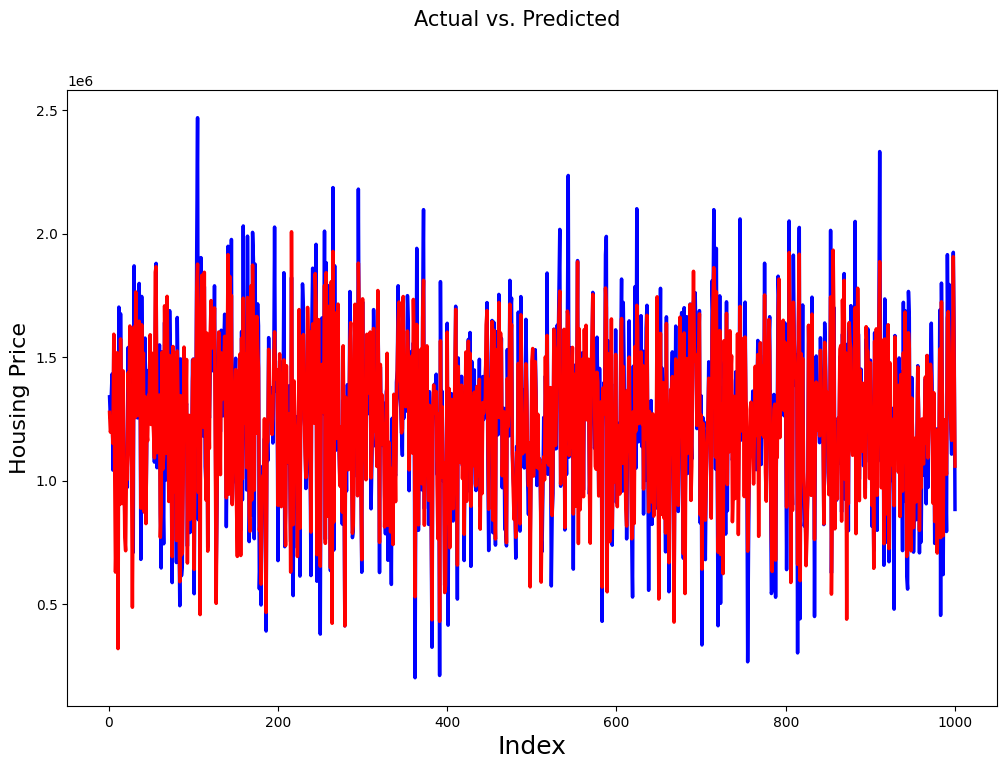

In [45]:
c = [i for i in range(1,1001)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5 ) #Plotting Actual
plt.plot(c,y_test_pred, color="red",  linewidth=2.5 ) #Plotting predicted
fig.suptitle('Actual vs. Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

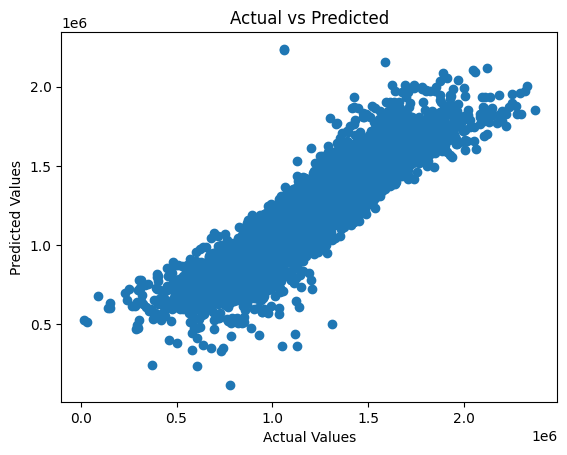

In [46]:
plt.scatter(y_train, y_train_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

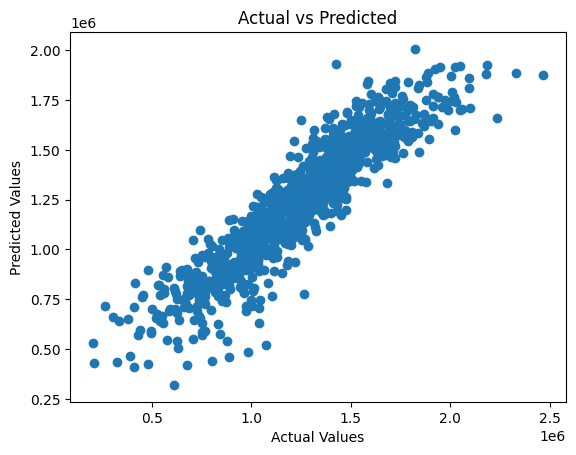

In [47]:
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Intiating Random Forest Regression

In [48]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
y_test_pred = regressor.predict(X_test)
y1_train_pred = regressor.predict(X_train)

In [50]:
print('R2 = ', r2_score(y_train, y1_train_pred))
print('MAE = ', mean_absolute_error(y_train, y1_train_pred))
print('MRSE = ', mean_squared_error(y_train, y1_train_pred))

R2 =  0.9803067717439746
MAE =  38927.179892919994
MRSE =  2462532729.902597


In [51]:
print('R2 = ', r2_score(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))
print('MRSE = ', mean_squared_error(y_test, y_test_pred))

R2 =  0.8556224327082248
MAE =  103675.782843574
MRSE =  17763126363.4918


Text(0, 0.5, 'Housing Price')

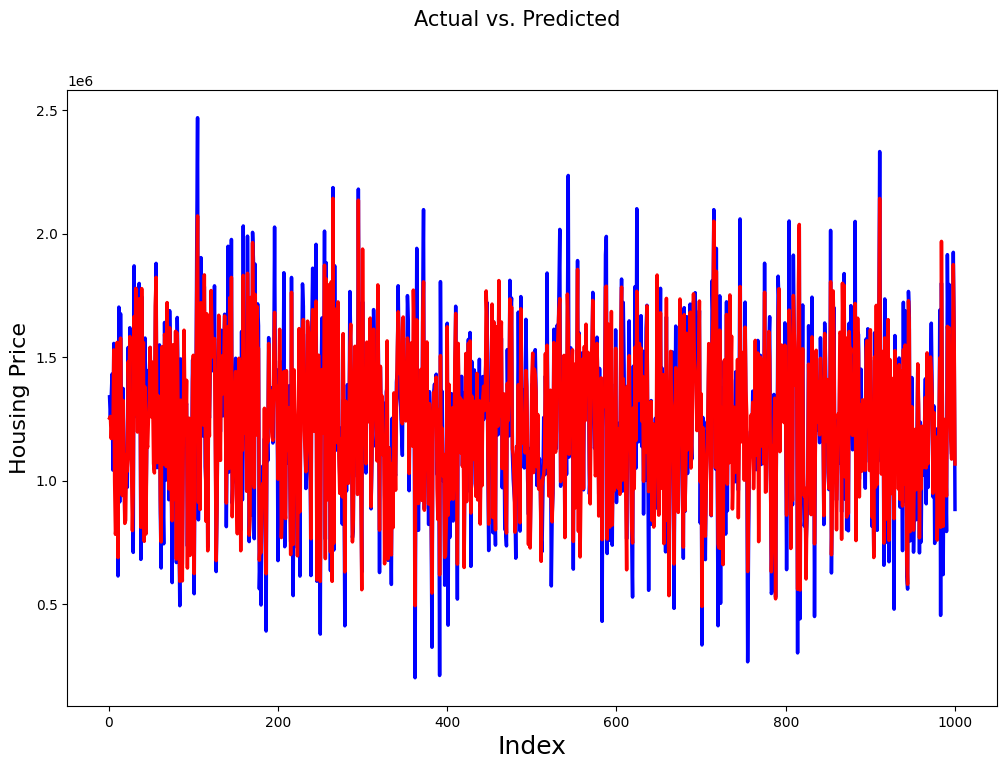

In [52]:
c = [i for i in range(1,1001)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5 ) #Plotting Actual
plt.plot(c,y_test_pred, color="red",  linewidth=2.5 ) #Plotting predicted
fig.suptitle('Actual vs. Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

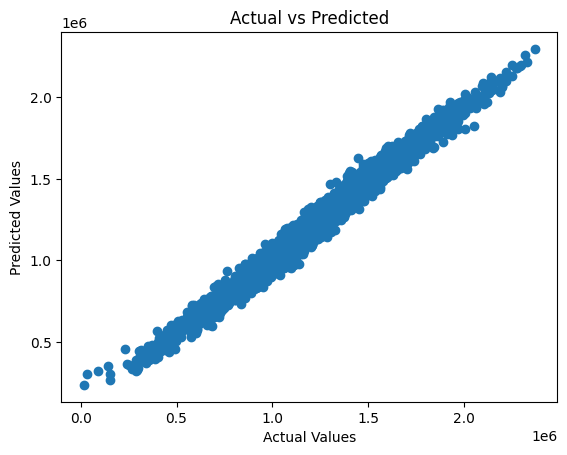

In [53]:
plt.scatter(y_train, y1_train_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

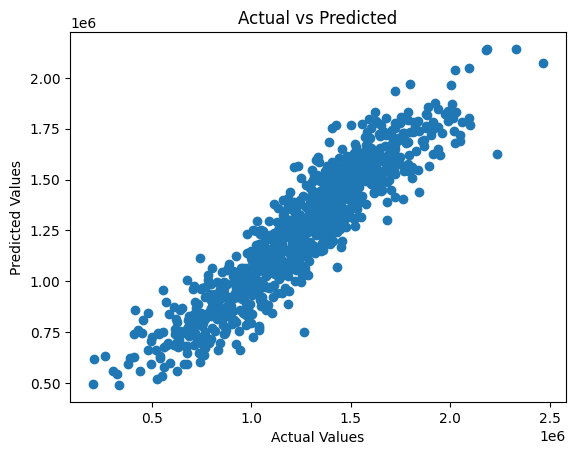

In [54]:
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

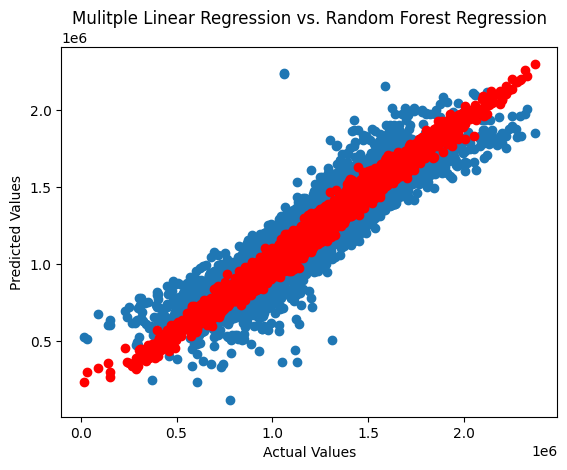

In [55]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_train, y1_train_pred, color="red")
plt.title('Mulitple Linear Regression vs. Random Forest Regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
#RED -> Random Forest Regression
#BLUE -> Multiple Linear Regression